# Time Serie Regression Analysis

In this toy study a Ordinary Regression Analysis will be performed over weather station data and reanalysis data. The reanalysis dataset comes from NOAA-NCEP data and observational data are from available datasets from Instituto Brasileiro de Meteorologia INMET.

Among other applications, Regression Analysis figures as an importat tool to test linear relationships between two variables which are expected to represent the same values. In this case it will be applied to test if model simulated data in the reanalysis process representes, in a acceptable manner the observed data in a geographical point. The geograpical point is over Brazilian Northeast region. 

Normally Regression Analysis are composed by three stepes: the regression per si, error analysis and hipotesys tests. For this, the Python Skylearn  Kit figured as the best option for this study.


## Dataset and Extreme Indices

An widespread way to analyse climate data is to work with Extremes Indices. They are padronized index defined by the ETCCDI team and had been largely adopted by scientific comunity. 

Here, the TXn index will be studied. It is defined as the minimum maximum temperature in a given time period. Here we will analyse monthly temperature values. 

Given the maximum daily recorded temperature time series from observational data and reanalysis, lets compute the monthly TNx indices. The time series starts in 1996 until 2016.

In [1]:
import pandas as pd
path = '/media/desplein/store/projetoMeteo/data_bases/'
ini = '1996-01-01'
end = '2016-11-30'
locations = ['BARBALHA']

stations = pd.read_csv(path + 'station_tmax_BARBALHA.csv', index_col=0, parse_dates=True)
reanalysis = pd.read_csv(path + 'noaa_reanalysis_tmax_BARBALHA.csv', index_col=0, parse_dates=True)


Taking a look in the data loaded

In [2]:
stations.head()

,BARBALHA
1996-01-01,33.2
1996-01-02,34.4
1996-01-03,34.3
1996-01-04,33.9
1996-01-05,34.9


In [3]:
reanalysis.head()

,BARBALHA
1996-01-01,26.250031
1996-01-02,25.050018
1996-01-03,26.850006
1996-01-04,26.250031
1996-01-05,26.750031


Now, we must to reframe the original daily data resampling daily data to monthly and geting minimum monthly value

In [4]:
# Reframing daily data to monthly frequency and get its minimums

TXn_station = stations.resample('m').min()
TXn_reanalysis = reanalysis.resample('m').min()

In [5]:
TXn_station.head()

,BARBALHA
1996-01-31,25.3
1996-02-29,26.9
1996-03-31,28.0
1996-04-30,28.1
1996-05-31,26.6


In [6]:
TXn_reanalysis.head()

,BARBALHA
1996-01-31,24.149994
1996-02-29,23.950012
1996-03-31,24.050018
1996-04-30,23.649994
1996-05-31,24.350006


Now, from computed indices it is possible to plot the time series for all the avalable period.

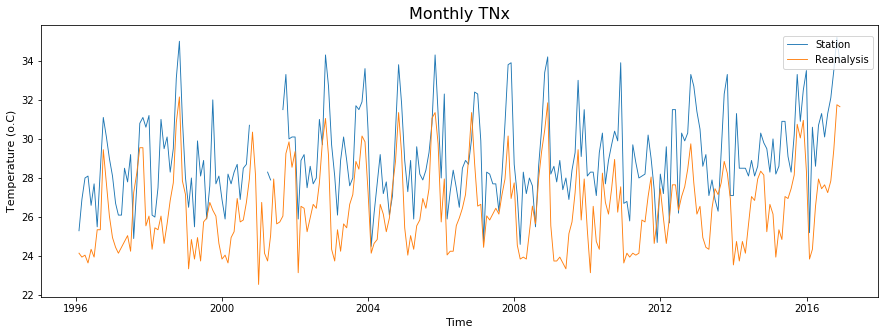

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(TXn_station, label = 'Station', linewidth=0.9)
plt.plot(TXn_reanalysis, label = 'Reanalysis', linewidth=0.9)

plt.ylabel("Temperature (o.C)", fontsize=11)
plt.xlabel("Time", fontsize=11)
plt.title('Monthly TNx', fontsize=16)
plt.legend(bbox_to_anchor=[1, 0.9], loc='right')

plt.grid(False)
plt.show()


It is possible to see that ECMWF reanalysis underestimate the observed indices sistematicaly. In all observations, the maximuns from reanalisys are lower than the observed maximuns and the minimuns are under the minimuns recorded.

## Ordinary Least Squares

As interesting way to assess the quality of an estimation of a given phisical quantity is to perform an Ordinary Leas Squares regression between observed and estimated data. The intution is that if the estimated data approximates well the observed data, there will be a small dispersion of points around the fitted line and the angular coefficiente of the regression will be 45°.

Linear	regression	tries	to	fit	a	line	through	a	given	set	of	points,	choosing	the	best	fit.	The
best	fit	is	the	line	that	minimizes	the	summed	squared	difference	between	the	value
dictated	by	the	line	for	a	certain	value	of	x	and	its	corresponding	y	values.	(It	is	optimizing
the	same	squared	error	that	we	met	before	when	checking	how	good	a	mean	was	as	a
predictor.)
Since	linear	regression	is	a	line;	in	bi-dimensional	space	(x,	y),	it	takes	the	form	of	the
classical	formula	of	a	line	in	a	Cartesian	plane:	y	=	mx	+	q,	where	m	is	the	angular
coefficient	(expressing	the	angle	between	the	line	and	the	x	axis)	and	q	is	the	intercept
between	the	line	and	the	x	axis.
Formally,	machine	learning	indicates	the	correct	expression	for	a	linear	regression	as
follows:

$ x = aX + b $

Here,	again,	X	is	a	matrix	of	the	predictors,	β	is	a	matrix	of	coefficients,	and	β0 	is	a
constant	value	called	the	bias	(it	is	the	same	as	the	Cartesian	formulation,	only	the
notation	is	different).



In [8]:
from statsmodels.formula.api import ols

# Adjusting data
data = pd.concat([TXn_station, TXn_reanalysis], axis=1).dropna().values
data_dict = pd.DataFrame(dict(x = data[:,0], y = data[:,1]))
model = ols("y ~ x", data_dict).fit()

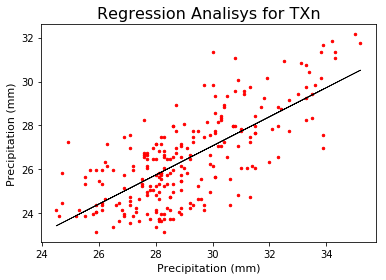

In [9]:
# Plotting the results
plt.scatter(data_dict['x'], data_dict['y'],  color='red', s=6)
plt.plot(data_dict['x'], model.predict(), color='black',  linewidth=0.8)
name = 'Monthly TNx'
labelName = 'T (o.C)'
labelName = 'Precipitation (mm)'
plt.title("Regression Analisys for TXn" , fontsize=16)
plt.ylabel(labelName, fontsize=11)
plt.xlabel(labelName, fontsize=11)
plt.show()


In [10]:
 model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     260.8
Date:                Fri, 03 Nov 2017   Prob (F-statistic):           2.92e-40
Time:                        16:53:30   Log-Likelihood:                -430.86
No. Observations:                 243   AIC:                             865.7
Df Residuals:                     241   BIC:                             872.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1765      1.197      5.994      0.000       4.818       9.535
x              0.6631      0.041     16.151      0.000       0.582       0.744
==============================================================================
Omnibus:                        2.618   Durbin-Watson:                   1.231
Prob(Omnibus):                  0.270   Jarque-Bera (JB):                1.999
Skew:                           0.044   Prob(JB):                        0.368
Kurtosis:                       2.565   Cond. No.                         381.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Most of these statistics make sense when dealing with more	than	one	predictor
variable,	so	they	will	be	discussed	in	the	next	chapter.	Thus,	for	the	moment,	as	we	are
working	with	a	simple	linear	regression,	the	two	measures	that	are	worth	examining
closely	are	F-statistic	and	R-squared.	F-statistic	is	actually	a	test	that	doesn’t	tell	you	too
much	if	you	have	enough	observations	and	you	can	count	on	a	minimally	correlated
predictor	variable.	Usually	it	shouldn’t	be	much	of	a	concern	in	a	data	science	project.
R-squared	is	instead	much	more	interesting	because	it	tells	you	how	much	better	your regression	model	is	in	comparison	to	a	single	mean.	It	does	so	by	providing	you	with	a
percentage	of	the	unexplained	variance	of	a	mean	as	a	predictor	that	actually	your	model
was	able	to	explain.

A	close	analysis	of	residuals	is	quite	relevant	in	statistical	practice	since	it	can	highlight
the	presence	of	serious	problems	with	regression	analysis.	When	working	with	a	single
variable	it	is	interesting	to	visually	check	its	residuals	to	figure	out	if	there	are	strange
cases	or	if	the	residuals	don’t	distribute	randomly.	In	particular,	it	is	important	to	keep	an
eye	out	for	any	of	these	three	problems	showing	up:
1.	 Values	too	far	from	the	average.	Large	standardized	residuals	hint	at	a	serious
difficulty	when	modeling	such	observations.	Also,	in	the	process	of	learning	these
values,	the	regression	coefficients	may	have	been	distorted.
2.	 Different	variance	in	respect	of	the	value	of	the	predictor.	If	the	linear	regression	is	an
average	conditioned	on	the	predictor,	dishomogeneous	variance	points	out	that	the
regression	is	not	working	properly	when	the	predictor	has	certain	values.
3.	 Strange	shapes	in	the	cloud	of	residual	points	may	indicate	that	you	need	a	more
complex	model	for	the	data	you	are	analyzing.
In	our	case,	we	can	easily	compute	the	residuals	by	subtracting	the	fitted	values	from	the
answer	variable	and	then	plotting	the	resulting	standardized	residuals	in	a	graph:

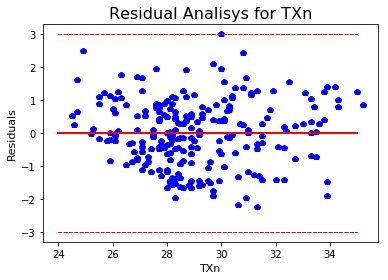

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt


def standardize(x):
    return (x-np.mean(x))/np.std(x)

fitted_values = model.predict(data_dict['x'])
residuals = data_dict['y'] - fitted_values
normalized_residuals = standardize(residuals)

x_range = [data_dict['x'].min(), data_dict['x'].max()]
y_range = [data_dict['y'].min(), data_dict['y'].max()]

residual_scatter_plot = plt.plot(data_dict['x'], normalized_residuals,'bp')
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color='red', linewidth=1)

plt.title("Residual Analisys for TXn" , fontsize=16)
plt.ylabel("Residuals", fontsize=11)
plt.xlabel("TXn", fontsize=11)
plt.show();


As can be seen, the residuals shows a random behaviour.